In [1]:
import pandas as pd
housing = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")
housing.head()  #displays the first 5 lines of the csv file

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing.info()  #gives a brief information about the file ( no. of entries , no. of columns
                # non-null count , datatype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing["ocean_proximity"].value_counts()  # To know what categories exist and no. of entries of that type

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
'''a percentile indicates the value below which a given percentage of observations in a group of observations falls.
For example, 25% of the districts have a housing_median_age lower than
18'''

'a percentile indicates the value below which a given percentage of observations in a group of observations falls.\nFor example, 25% of the districts have a housing_median_age lower than\n18'

In [5]:
housing.describe()  #gives the summary of the numerical attributes (null values are ignored)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
''' """A histogram for numerical attributes shows the number of 
instances (on the vertical axis) that have a given value range (on the horizontal axis)"""'''

' """A histogram for numerical attributes shows the number of \ninstances (on the vertical axis) that have a given value range (on the horizontal axis)"""'

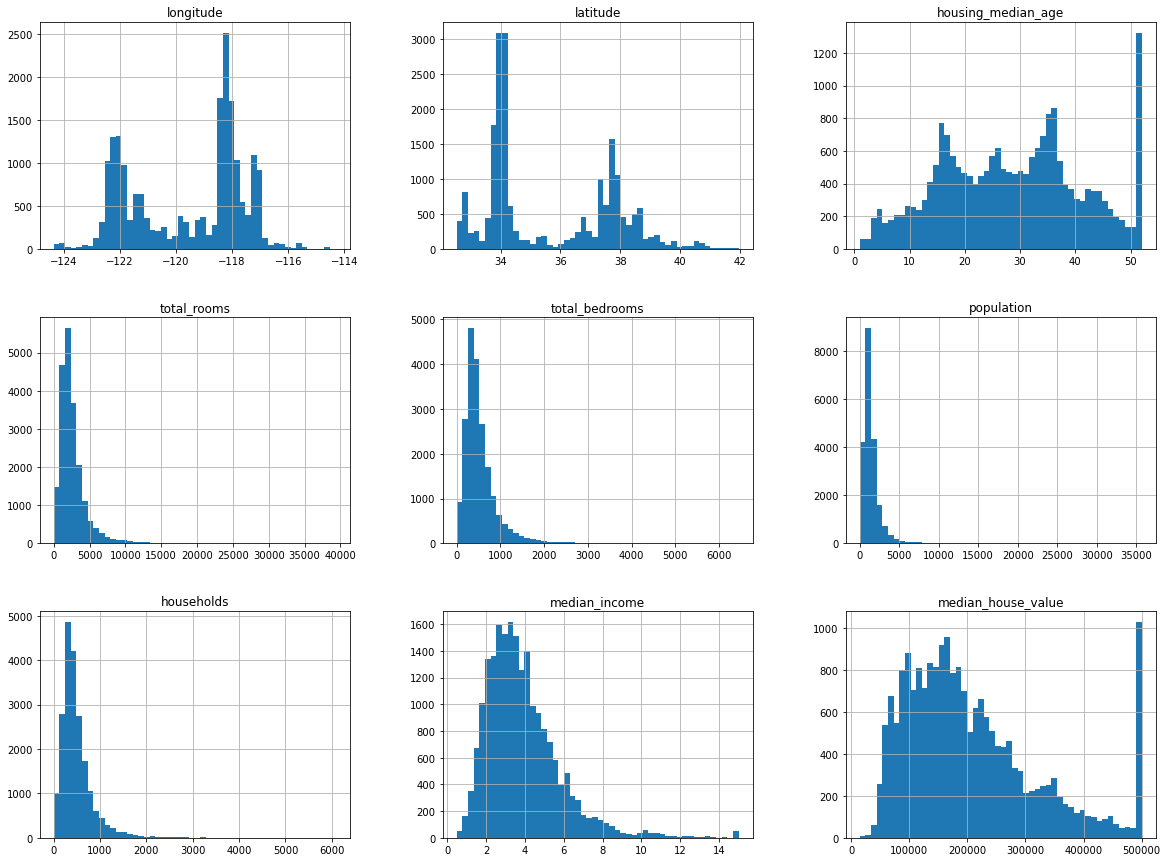

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt 
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
import numpy as np
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))   #but this is not an efficient method since,
 test_set_size = int(len(data) * test_ratio)           #as we execute it many times machine will see 
 test_indices = shuffled_indices[:test_set_size]       #nearly the whole data which is not at all good
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [10]:
len(test_set)

4128

In [11]:
# one way is to save the test data and work on it 
'''Another option is to set the random number generator’s seed (e.g., np.ran
dom.seed(42))
14 before calling np.random.permutation(), so that it always generates
the same shuffled indices.
'''
#But both these solutions will break next time you fetch an updated dataset

'Another option is to set the random number generator’s seed (e.g., np.ran\ndom.seed(42))\n14 before calling np.random.permutation(), so that it always generates\nthe same shuffled indices.\n'

In [12]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
 return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
def split_train_test_by_id(data, test_ratio, id_column):
 ids = data[id_column]
 in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
 return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [14]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")


In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<AxesSubplot:>

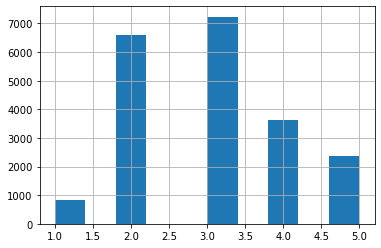

In [16]:
housing["income_cat"] = pd.cut(housing["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]

In [18]:
 strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [19]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)


In [20]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

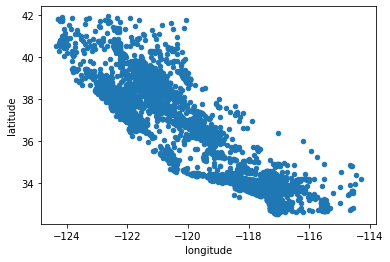

In [21]:
#scatterplot of all districts to visualize the data
housing.plot(kind="scatter",x="longitude",y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

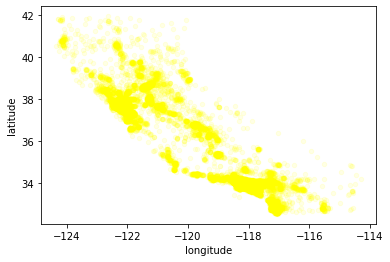

In [22]:
housing.plot(kind="scatter",x="longitude",y="latitude",color ="yellow",alpha=0.1)#Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points

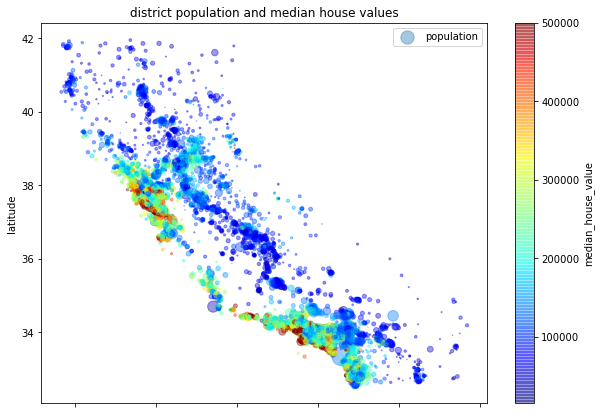

In [23]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,xlabel="longitude",title="district population and median house values",
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [24]:
#As the size of data set is small we can directly calculate the correelations between attributes
corr_matrix = housing.corr()    
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

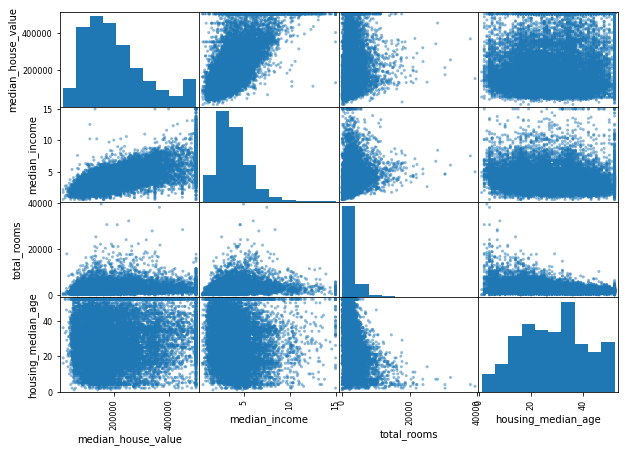

In [25]:
'''Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute.'''

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes],figsize=(10,7))

'Second, the price\ncap that we noticed earlier is clearly visible as a horizontal line at $500,000. But this\nplot reveals other less obvious straight linesYou may want to try removing the corresponding districts to prevent your algorithms\nfrom learning to reproduce these data quirks'

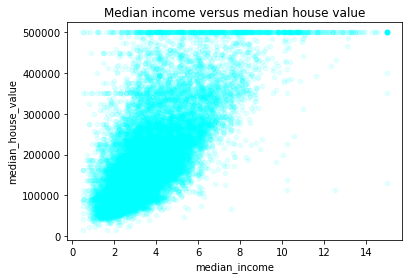

In [26]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",title="Median income versus median house value",color="cyan",alpha=0.1)
"""Second, the price
cap that we noticed earlier is clearly visible as a horizontal line at $500,000. But this
plot reveals other less obvious straight linesYou may want to try removing the corresponding districts to prevent your algorithms
from learning to reproduce these data quirks"""

In [27]:
#Experimenting with Attribute Combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [28]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [29]:
# to handle missing values
"""• Get rid of the corresponding districts.
• Get rid of the whole attribute.
• Set the values to some value (zero, the mean, the median, etc.).
You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna()
methods:
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)"""


'• Get rid of the corresponding districts.\n• Get rid of the whole attribute.\n• Set the values to some value (zero, the mean, the median, etc.).\nYou can accomplish these easily using DataFrame’s dropna(), drop(), and fillna()\nmethods:\nhousing.dropna(subset=["total_bedrooms"]) # option 1\nhousing.drop("total_bedrooms", axis=1) # option 2\nmedian = housing["total_bedrooms"].median() # option 3\nhousing["total_bedrooms"].fillna(median, inplace=True)'

In [30]:
""" First, you need to create a SimpleImputer instance, specifying
that you want to replace each attribute’s missing values with the median of that
attribute. Since the median can only be computed on numerical attributes, we need to create a
copy of the data without the text attribute ocean_proximity:  Now you can use this “trained” imputer to 
transform the training set by replacing missing values by the learned medians The result is a plain NumPy 
array containing the transformed features If you want to put it back into a Pandas DataFrame """

' First, you need to create a SimpleImputer instance, specifying\nthat you want to replace each attribute’s missing values with the median of that\nattribute. Since the median can only be computed on numerical attributes, we need to create a\ncopy of the data without the text attribute ocean_proximity:  Now you can use this “trained” imputer to \ntransform the training set by replacing missing values by the learned medians The result is a plain NumPy \narray containing the transformed features If you want to put it back into a Pandas DataFrame '

In [31]:
#Method 2 : using SimpleImputer
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy = "median")
housing_num = housing.drop("ocean_proximity",axis = 1)
imputer.fit(housing_num)
x = imputer.transform(housing_num)
housing_tr = pd.DataFrame(x,columns = housing_num.columns)

In [32]:
#Handling Text and Categorical Attributes
#For this, we can use Scikit-Learn’s OrdinalEncoder class19:
housing_cat = housing[["ocean_proximity"]]
#just converts categorical into numeric
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)


In [33]:
#Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors20:
#one-hot vectors : only 1 attributes value will be 1 and all the other will be zero
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
#Notice that the output is a SciPy sparse matrix, instead of a NumPy array.
#to convert it to a (dense) NumPy array, just call the toarray() method:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
   self.add_bedrooms_per_room = add_bedrooms_per_room
 def fit(self, X, y=None):
   return self # nothing else to do
 def transform(self, X, y=None):
   rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
   population_per_household = X[:, population_ix] / X[:, households_ix]
   if self.add_bedrooms_per_room:
     bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
     return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
   else:
    return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)


In [36]:
'''So far, we have handled the categorical columns and the numerical columns sepa‐
rately. It would be more convenient to have a single transformer able to handle all col‐
umns, applying the appropriate transformations to each column'''
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)

In [37]:
#Training and Evaluating on the Training Set
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
#testing
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions : ", lin_reg.predict(some_data_prepared))
print("Labels : ", list(some_labels))

Predictions :  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels :  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [38]:
#Let’s measure this regression model’s RMSE on the whole training
# set using Scikit-Learn’s mean_squared_error function:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [39]:
#here the result is not satisfying as the rmse is not as small as expected 
#so we will select another complicated model to predict
'''Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding
complex nonlinear relationships in the data'''
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#Evaluation Using Cross-Validation
#method 1 :to use the train_test_split function to split the training set into a smaller training set and a validation set, 
'''A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. The follow‐
ing code randomly splits the training set into 10 distinct subsets called folds, then it
trains and evaluates the Decision Tree model 10 times, picking a different fold for
evaluation every time and training on the other 9 folds. The result is an array con‐
taining the 10 evaluation scores:'''

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([69356.74922626, 67397.11036025, 70685.69715544, 69346.90119818,
       71799.3251145 , 75131.97373348, 71309.55503839, 71811.54903526,
       76719.51882847, 70212.40383386])

In [41]:
print(tree_rmse_scores.mean())
print(tree_rmse_scores.std())

71377.0783524087
2624.69988819903


In [42]:
#Let’s compute the same scores for the Linear Regression model just to be sure:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print(lin_rmse_scores)
print(lin_rmse_scores.mean())
print(lin_rmse_scores.std())

[66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
69052.46136345083
2731.6740017983443


#e RandomForestRegressor model (model 3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print(forest_rmse_scores)
print(forest_rmse_scores.mean())
print(forest_rmse_scores.std())

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)


In [ ]:
 grid_search.best_params_


In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
 print(np.sqrt(-mean_score), params)


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47,730.2